In [1]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

In [2]:


data_path = 'data/Kraken_OHLCVT'
# full_path = data_path + table
# df = pd.read_csv(full_path, header=None)
# df

In [3]:
import os

file_names = os.listdir(data_path)

btc = [f for f in file_names if "BTC" in f]
# eth = [f for f in file_names if "ETH" in f.upper()]
# sol = [f for f in file_names if "SOL" in f.upper()]

In [4]:
df = pd.read_csv(data_path + "/XBTUSDC_1.csv", header=None)
df["timestamp"] = pd.to_datetime(df[0], unit='s') 

In [5]:
X = df[[4, 'timestamp']]

In [6]:
pattern = r"(?<!\d)1(?!\d)"
import re

p = r'-'

file_aggs = [re.split(f, p)[0] for f in file_names]

# one =[f for f in file_names if re.match(pattern, f)]

# five
# fifteen
# thirty
# sixty
# two40
# seven20
# forteen40
one
file_aggs


NameError: name 'one' is not defined

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df is already created and 'timestamp' is in datetime format
# df['timeseries'] = df['timestamp']  # You can rename it if necessary

# # Set the plot style
# sns.set(style='whitegrid')

# # Create the plot
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df, x='timestamp', y=4)  # Replace 'value' with the actual column you want to plot

# # Customize the plot
# plt.title('Time Series Plot')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
eth = pd.read_csv(data_path + "/ETHUSD_1.csv", header=None)
# eth

,0,1,2,3,4,5,6
0,1438956180,3.00000,3.00000,3.00,3.00,81.857278,2
1,1438967940,3.00001,3.00001,3.00,3.00,42.073291,2
2,1439016180,3.00000,3.00000,3.00,3.00,0.400000,1
3,1439026260,2.00000,2.00000,2.00,2.00,125.000000,2
4,1439051400,1.20000,1.20000,1.20,1.20,54.759700,1
...,...,...,...,...,...,...,...
3493480,1727740500,2597.52000,2598.13000,2597.52,2598.13,0.714424,7
3493481,1727740560,2598.64000,2600.99000,2598.64,2600.99,0.985735,16
3493482,1727740620,2601.93000,2601.93000,2601.93,2601.93,0.105847,4
3493483,1727740680,2602.25000,2603.48000,2602.24,2603.48,5.066109,11


In [ ]:
eth["timestamp"] = pd.to_datetime(eth[0], unit='s') 
eth_X = eth[[4, 'timestamp']]


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df is already created and 'timestamp' is in datetime format
# # df['timeseries'] = df['timestamp']  # You can rename it if necessary

# # Set the plot style
# sns.set(style='whitegrid')

# # Create the plot
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=eth, x='timestamp', y=4)  # Replace 'value' with the actual column you want to plot

# # Customize the plot
# plt.title('Time Series Plot')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
X = df[[0, 4]]

In [ ]:
x = X.to_numpy()

In [ ]:
#timestamp, close numpy array:
x

array([[1.57849734e+09, 8.30000000e+03],
       [1.57849758e+09, 8.30000000e+03],
       [1.57849974e+09, 8.21751000e+03],
       ...,
       [1.72773996e+09, 6.31618300e+04],
       [1.72774002e+09, 6.32157100e+04],
       [1.72774056e+09, 6.32714000e+04]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_rsi(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices = pd.Series(close_prices)

    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    rsi_array = np.column_stack((timestamps, rsi))
    return rsi_array

def calculate_sma(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    sma = pd.Series(close_prices).rolling(window=period).mean()

    sma_array = np.column_stack((timestamps, sma))
    return sma_array

def calculate_ema(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    ema = pd.Series(close_prices).ewm(span=period, adjust=False).mean()

    ema_array = np.column_stack((timestamps, ema))
    return ema_array

def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices_series = pd.Series(close_prices)
    
    ema_short = prices_series.ewm(span=short_period, adjust=False).mean()
    ema_long = prices_series.ewm(span=long_period, adjust=False).mean()
    macd_line = ema_short - ema_long
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

    macd_array = np.column_stack((timestamps, macd_line, signal_line))
    return macd_array

def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices_series = pd.Series(close_prices)
    
    sma = prices_series.rolling(window=period).mean()
    std_dev = prices_series.rolling(window=period).std()
    
    upper_band = sma + (std_dev * num_std_dev)
    lower_band = sma - (std_dev * num_std_dev)

    bands_array = np.column_stack((timestamps, upper_band, lower_band))
    return bands_array

def calculate_stochastic_oscillator(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices_series = pd.Series(close_prices)
    
    lowest_low = prices_series.rolling(window=period).min()
    highest_high = prices_series.rolling(window=period).max()
    
    stochastic = 100 * (prices_series - lowest_low) / (highest_high - lowest_low)

    stoch_array = np.column_stack((timestamps, stochastic))
    return stoch_array

def calculate_atr(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 3:
        raise ValueError("Input must be a 2D NumPy array with at least three columns.")
    
    high_prices = data[:, 1].astype(float)
    low_prices = data[:, 2].astype(float)
    close_prices = data[:, 1].astype(float)

    tr = np.maximum(high_prices[1:] - low_prices[1:], 
                    np.maximum(np.abs(high_prices[1:] - close_prices[:-1]), 
                               np.abs(low_prices[1:] - close_prices[:-1])))
    atr = pd.Series(tr).rolling(window=period).mean()

    atr_array = np.column_stack((data[1:, 0], atr))  # Shift timestamps for ATR
    return atr_array

def calculate_obv(data):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    volume = data[:, 1].astype(float)  # Assuming volume is in the second column for simplicity
    timestamps = data[:, 0]

    obv = np.zeros_like(close_prices)
    for i in range(1, len(close_prices)):
        if close_prices[i] > close_prices[i - 1]:
            obv[i] = obv[i - 1] + volume[i]
        elif close_prices[i] < close_prices[i - 1]:
            obv[i] = obv[i - 1] - volume[i]
        else:
            obv[i] = obv[i - 1]

    obv_array = np.column_stack((timestamps, obv))
    return obv_array

def calculate_adx(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 3:
        raise ValueError("Input must be a 2D NumPy array with at least three columns.")
    
    high_prices = data[:, 1].astype(float)
    low_prices = data[:, 2].astype(float)
    close_prices = data[:, 1].astype(float)

    plus_dm = np.maximum(high_prices[1:] - high_prices[:-1], 0)
    minus_dm = np.maximum(low_prices[:-1] - low_prices[1:], 0)

    tr = np.maximum(high_prices[1:] - low_prices[1:], 
                    np.maximum(np.abs(high_prices[1:] - close_prices[:-1]), 
                               np.abs(low_prices[1:] - close_prices[:-1])))
    
    adx = pd.Series(tr).rolling(window=period).mean()  # Placeholder for actual ADX calculation
    adx_array = np.column_stack((data[1:, 0], adx))  # Shift timestamps for ADX
    return adx_array

def calculate_roc(data, period=14):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices_series = pd.Series(close_prices)
    
    roc = ((prices_series - prices_series.shift(period)) / prices_series.shift(period)) * 100
    roc_array = np.column_stack((timestamps, roc))
    return roc_array

def calculate_support_resistance(data, period=20):
    if not isinstance(data, np.ndarray) or data.ndim != 2 or data.shape[1] < 2:
        raise ValueError("Input must be a 2D NumPy array with at least two columns.")
    
    close_prices = data[:, 1].astype(float)
    timestamps = data[:, 0]
    prices_series = pd.Series(close_prices)
    
    support = prices_series.rolling(window=period).min()
    resistance = prices_series.rolling(window=period).max()
    
    sr_array = np.column_stack((timestamps, support, resistance))
    return sr_array


In [ ]:
def visualize_rsi(rsi, timestamps):
    if not isinstance(rsi, np.ndarray) or rsi.ndim != 1:
        raise ValueError("Input must be a 1D NumPy array.")
    
    if len(rsi) != len(timestamps):
        raise ValueError("Length of RSI and timestamps must be the same.")
    
    dates = pd.to_datetime(timestamps, unit='s')

    plt.figure(figsize=(12, 6))
    plt.plot(dates, rsi, label='RSI', color='orange')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='green', alpha=0.5)
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.grid()
    plt.legend()
    plt.show()

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_two_time_series(data1, data2):
    """
    Plots two 2D NumPy arrays against each other with matching timestamps using twin axes.
    
    Parameters:
    data1 : np.ndarray
        First 2D array with timestamps in the first column and values in the second column.
    data2 : np.ndarray
        Second 2D array with timestamps in the first column and values in the second column.
    """
    if (not isinstance(data1, np.ndarray) or data1.ndim != 2 or data1.shape[1] < 2 or
        not isinstance(data2, np.ndarray) or data2.ndim != 2 or data2.shape[1] < 2):
        raise ValueError("Both inputs must be 2D NumPy arrays with at least two columns.")
    
    # Extract timestamps and values
    timestamps1 = data1[:, 0]
    values1 = data1[:, 1]
    
    timestamps2 = data2[:, 0]
    values2 = data2[:, 1]
    
    # Ensure timestamps match
    common_timestamps = np.intersect1d(timestamps1, timestamps2)
    values1_common = values1[np.isin(timestamps1, common_timestamps)]
    values2_common = values2[np.isin(timestamps2, common_timestamps)]
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot first series
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Data Series 1', color='blue')
    ax1.plot(common_timestamps, values1_common, label='Data Series 1', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for the second series
    ax2 = ax1.twinx()
    ax2.set_ylabel('Data Series 2', color='orange')
    ax2.plot(common_timestamps, values2_common, label='Data Series 2', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Title and grid
    plt.title('Comparison of Two Time Series')
    fig.tight_layout()  # To avoid overlap
    plt.grid()
    plt.show()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix_with_viz(arrays, labels=None):
    """
    Calculate the correlation matrix of a list of 2D NumPy arrays and visualize it with custom labels.
    
    Parameters:
    arrays : list of np.ndarray
        List of 2D arrays, where each array has timestamps in the first column and values in the second column.
    labels : list of str, optional
        Custom labels for each series in the correlation matrix.

    Returns:
    pd.DataFrame
        Correlation matrix of the values.
    """
    # Dictionary to store the values indexed by timestamps
    data_dict = {}

    # Iterate through each array
    for idx, array in enumerate(arrays):
        if not isinstance(array, np.ndarray) or array.ndim != 2 or array.shape[1] < 2:
            raise ValueError("Each input must be a 2D NumPy array with at least two columns.")
        
        timestamps = array[:, 0]
        values = array[:, 1]
        
        # Store values in the dictionary with timestamps as keys
        for timestamp, value in zip(timestamps, values):
            if timestamp not in data_dict:
                data_dict[timestamp] = {}
            data_dict[timestamp][f'Series_{idx}'] = value

    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data_dict, orient='index')

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # If custom labels are provided, update the correlation matrix's index and columns
    if labels is not None:
        if len(labels) != corr_matrix.shape[0]:
            raise ValueError("Number of labels must match the number of series.")
        corr_matrix.columns = labels
        corr_matrix.index = labels

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    return corr_matrix






In [ ]:
# List all function names in the current environment
function_names = [name for name, obj in globals().items() if callable(obj)]
print(function_names)


['get_ipython', 'exit', 'quit', 'open', '___', 'datetime', 'timedelta', 'calculate_rsi', 'calculate_sma', 'calculate_ema', 'calculate_macd', 'calculate_bollinger_bands', 'calculate_stochastic_oscillator', 'calculate_atr', 'calculate_obv', 'calculate_adx', 'calculate_roc', 'calculate_support_resistance', 'visualize_time_series', '_108', 'visualize_rsi', 'plot_two_time_series', 'correlation_matrix_with_viz']


1. Moving Averages (MA)
Simple Moving Average (SMA): The average of a security's price over a specified period.
Exponential Moving Average (EMA): Similar to SMA, but gives more weight to recent prices, making it more responsive to new information.
2. Moving Average Convergence Divergence (MACD)
A trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. It consists of the MACD line, signal line, and histogram.
3. Bollinger Bands
A volatility indicator that consists of a middle band (SMA) and two outer bands (standard deviations away from the SMA). It helps identify overbought or oversold conditions.
4. Stochastic Oscillator
A momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period. It produces values between 0 and 100, helping identify overbought or oversold conditions.
5. Average True Range (ATR)
A measure of market volatility. It calculates the average range between high and low prices over a specified period.
6. Fibonacci Retracement Levels
Horizontal lines that indicate potential support and resistance levels based on the Fibonacci sequence. Traders use these levels to identify potential reversal points.
7. Volume
The number of shares or contracts traded in a security or market during a given period. High volume can indicate strong interest in a stock, while low volume may suggest weak interest.
8. On-Balance Volume (OBV)
A cumulative volume-based indicator that measures buying and selling pressure as a means of predicting price changes.
9. Average Directional Index (ADX)
A trend strength indicator that helps determine whether a market is trending or ranging. It combines both positive and negative directional indicators.
10. Price Rate of Change (ROC)
Measures the speed at which the price changes over a specified time period, helping identify momentum.
11. Candlestick Patterns
Various patterns formed by candlestick charts (e.g., Doji, Hammer, Engulfing) can signal potential reversals or continuation of trends.
12. Support and Resistance Levels
Price levels at which a stock tends to stop and reverse. Support is the price level where buying interest is strong enough to overcome selling pressure, while resistance is the opposite.

In [ ]:
rsi = calculate_rsi(x)
sma = calculate_sma(x)
ema = calculate_ema(x)
macd = calculate_macd(x)
bol_bands = calculate_bollinger_bands(x)
stoch_osc = calculate_stochastic_oscillator(x)
# atr = calculate_atr(x)
obv = calculate_obv(x)
# adx = calculate_adx(x)
roc = calculate_roc(x)
sup_resistance = calculate_support_resistance(x)

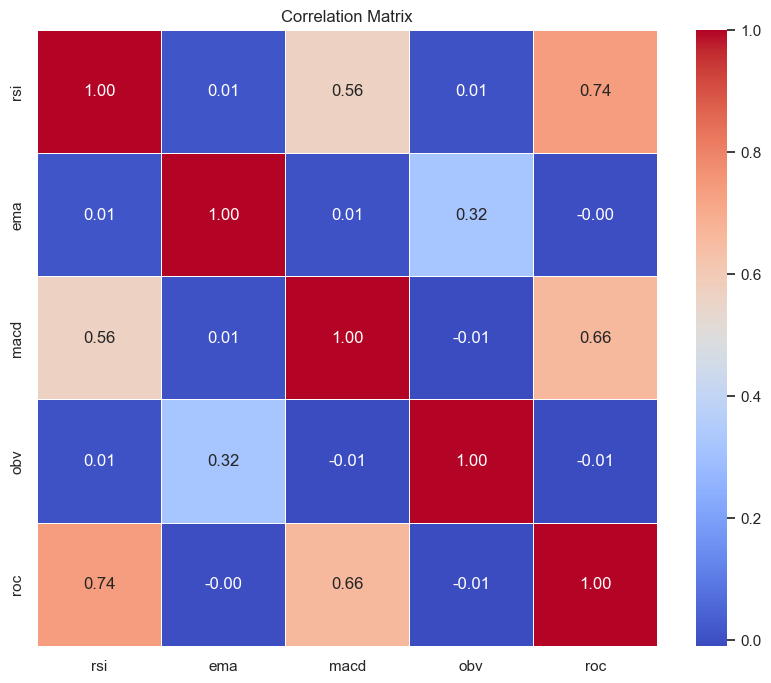

           rsi       ema      macd       obv       roc
rsi   1.000000  0.013450  0.563137  0.005630  0.736854
ema   0.013450  1.000000  0.006404  0.319307 -0.003976
macd  0.563137  0.006404  1.000000 -0.005046  0.658331
obv   0.005630  0.319307 -0.005046  1.000000 -0.008826
roc   0.736854 -0.003976  0.658331 -0.008826  1.000000


In [ ]:
arrays = [rsi, ema, macd, obv, roc]
corr_matrix = correlation_matrix_with_viz(arrays, labels = ["rsi", "ema", "macd", "obv", "roc"])
print(corr_matrix)

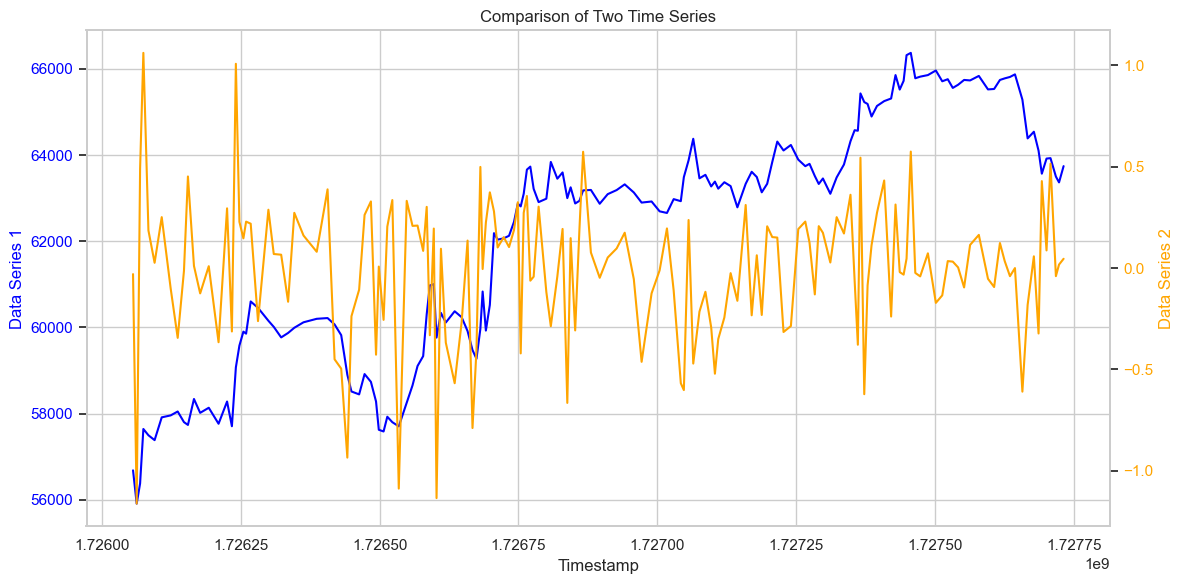

In [ ]:
plot_two_time_series(x[-10000::60], roc[-10000::60])


In [ ]:
rsi

array([[1.57849734e+09,            nan],
       [1.57849758e+09,            nan],
       [1.57849974e+09,            nan],
       ...,
       [1.72773996e+09, 3.06711912e+01],
       [1.72774002e+09, 3.47462079e+01],
       [1.72774056e+09, 4.53570576e+01]])